评价决策类：topsis法  假设有两个维度的参考值，就将这两个维度组合出的最好和最差视为直角坐标系上的两个点，每个决策都是一个点，计算点与点之间的距离    或称作逼近离线解排序法或优劣解距法

理想解：设想中最优的解，它的各个属性都是备选法案中最优：
负理想解与之相反

在多目标数据决策中十分有效，通过贴近度来排序作为评价目标优劣的判断，取值在0~1之间

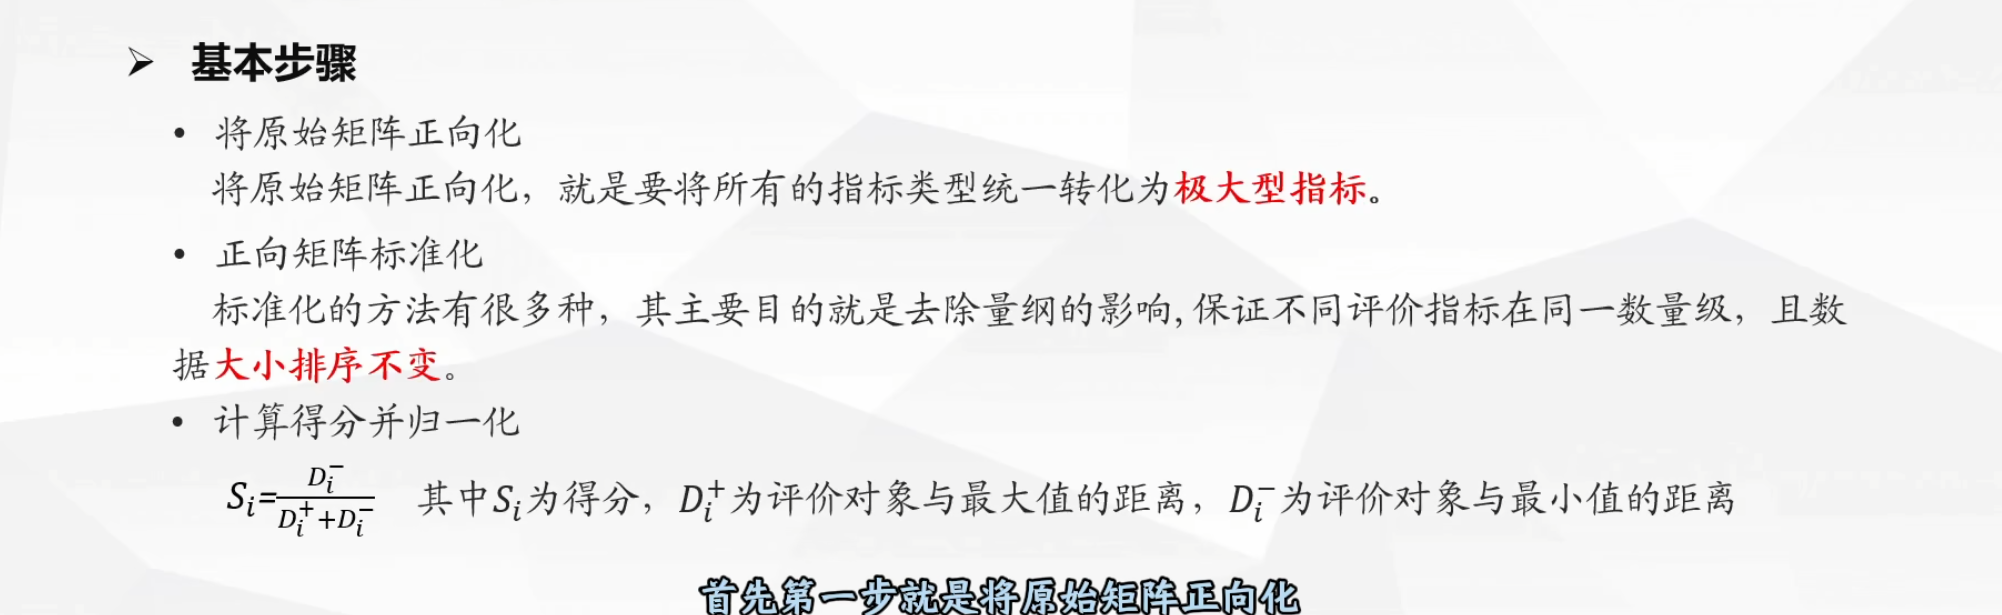

In [56]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-22 134915.png")

正向化是因为有一些值并不是越大越好：分为极大新指标，极小型指标（越小越好），中间型指标（越接近某个值越好），区间性指标（落在某个区间最好）, 正向化就是将下列三种指标转化为极大型指标。

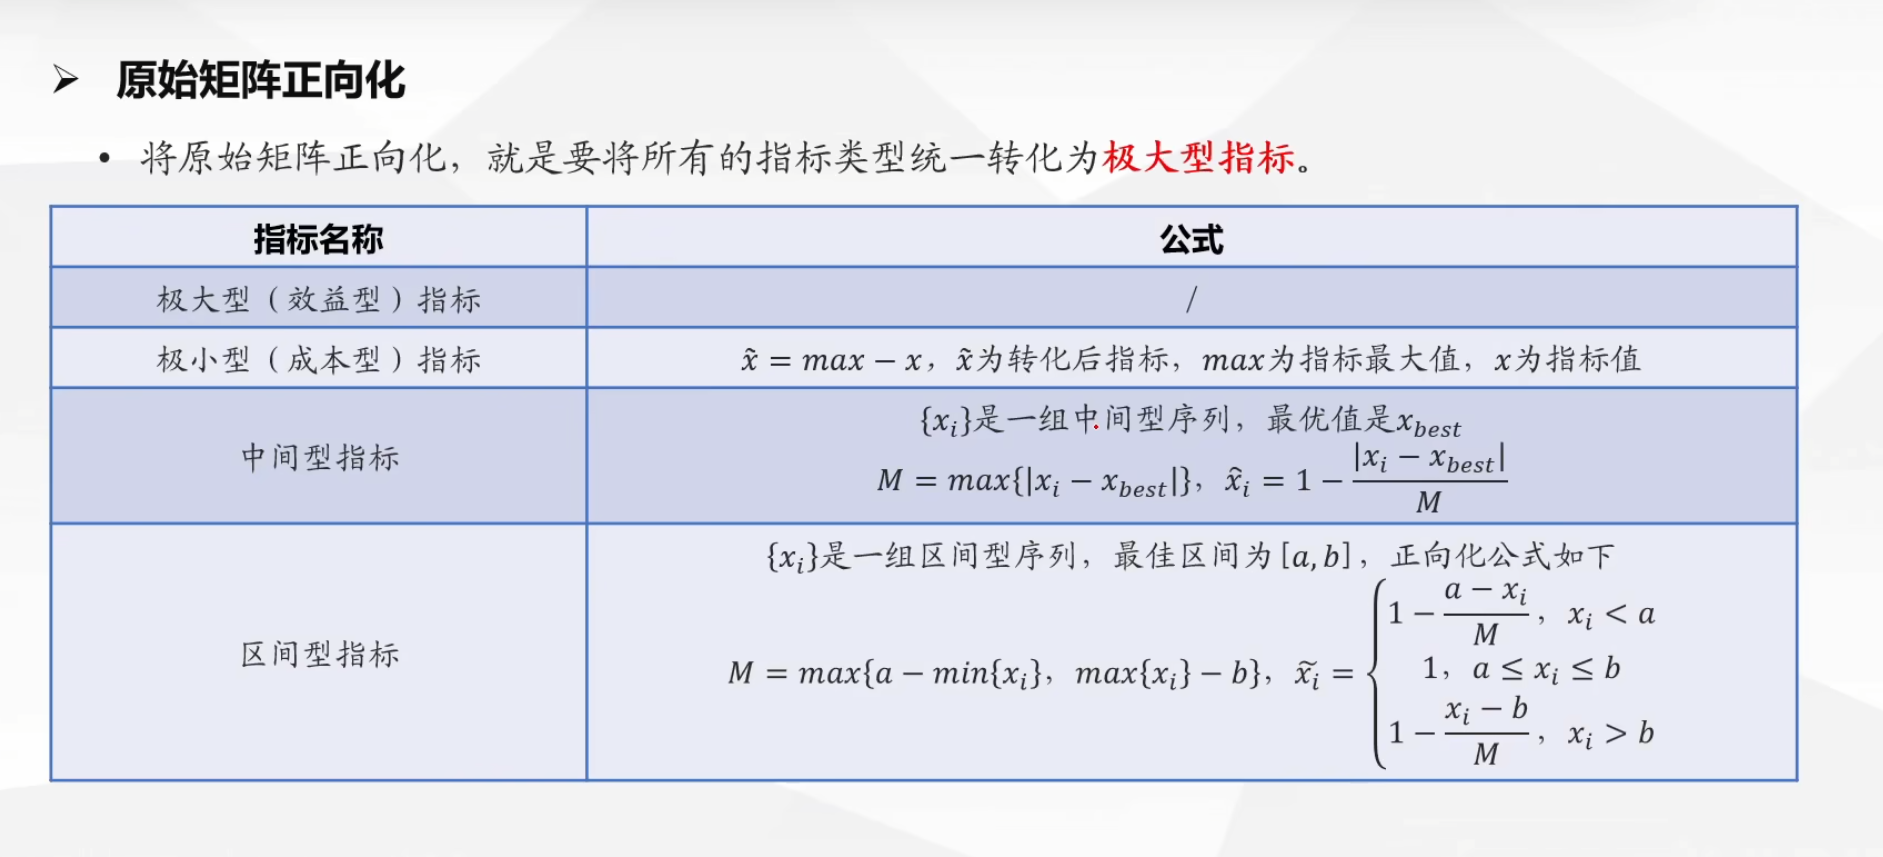

In [57]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-22 140709.png")

正向矩阵标准化要消除量纲的影响，可以同时进行加权处理

最后的最大值距离D+和最小值距离D-就用欧几里得距离平方公式就行

In [58]:
import numpy as np
print("输入参评数目：")
n = int(input())
print("输入指标数目：")
m = int(input())
print('请输入类型矩阵： 1.极大 2.极小 3。中间 4.区间')
kind = input().split(' ')##分割不同类型的的指标
print('请输入参评项目矩阵：')
A = np.zeros(shape = (n,m))
##D = np.vstack((D1,D2,D3)) 
for i in range(n):
    A[i] = input().split(' ')  
    A[i] = list(map(float,A[i]))  #map 函数同时对A【i】内的值进行float操作
print("输入矩阵为:\n{}".format(A))
    

输入参评数目：
输入指标数目：
请输入类型矩阵： 1.极大 2.极小 3。中间 4.区间
请输入参评项目矩阵：
输入矩阵为:
[[  9.  10. 175. 100.]
 [  8.   7. 167.  90.]
 [  6.   3. 154.  70.]]


正向化函数定义

In [64]:
def min1(maxx,x):
    x = list(x)
    ans = [[(maxx-i)] for i in x]
    return np.array(ans)
def mid(bestx,x):
    x = list(x)
    h = [abs(bestx-i) for i in x]
    M = max(h)
    if M == 0:
        M = 1
    else:
        ans = [[(1-i/M)] for i in h]
    return np.array(ans)
def range1(lowx, highx, x):
    x = list(x)
    x1 = 70
    M = max(lowx - x1, max(x) - highx)
    if M == 0:
        M = 1
    ans = []
    for i in range(len(x)):
        if x[i] < lowx:
            ans.append([1 - (lowx - x[i]) / M])
        elif x[i] > highx:
            ans.append([1 - (x[i] - highx) / M])
        else:
            ans.append([1])
    return np.array(ans)


统一指标类型

In [72]:
X = np.zeros(shape = (n,1))
for i in range(m):
    if kind[i] == '1':
        value = np.array(A[:,i])
    elif kind[i] == '2':
        maxx = max(A[:,i])
        value = min1(maxx,A[:,i])
    elif kind[i] == '3':
        print("输入类型三的最优值")
        bestx = (eval(input()))
        value = mid(bestx,A[:,i])
    elif kind[i] == '4':
        print("类型四的最大值：")
        highx = eval(input())
        print("类型四最小值 ：")
        lowx = eval(input())
        value = range1(lowx,highx,A[:,i])
    if i == 0:###同时是第一次循环
        X =value.reshape(-1,1)#将第一行从第一行换成第一列，并且使得后面类推,  当reshape的第一个值为-1时，自动识别所需行数，列数为第二个值
    else:
        X = np.hstack([X,value.reshape(-1,1)]) #hstack将多个数组水平堆叠在一起
    ###用reshape转化为列向量，再用hstack实现堆叠
        

输入类型三的最优值
类型四的最大值：
类型四最小值 ：


标准化处理

In [75]:
    X = X.astype("float")
    for j in range(m):
        X[:,j] = X[:,j]/np.sqrt(sum(X[:,j]**2))#对每一列进行标准化处理，使每一列的欧几里得范数（即平方和的平方根）为1。
    print("标准化矩阵为：\n{}".format(X))
    x_max = np.max(X,axis=0) #计算标准化矩阵每列的最大值
    x_min = np.min(X,axis=0)
    d_z = np.sqrt(np.sum(np.square((X - np.tile(x_max,(n,1)))),axis=1))#计算每个值到最优情况的距离，此时的每一行为一个评价的所有参数，而其中D+就是如（1，2，3）
    d_f = np.sqrt(np.sum(np.square((X - np.tile(x_min,(n,1)))),axis=1))#和（3，4，5）的差平方求和开根号
    print("每个指标最大值",x_max)
    print("每个指标最小值:",x_min)
    print("d+",d_z)
    print("d-",d_f)

标准化矩阵为：
[[0.66896473 0.         0.11043153 0.        ]
 [0.59463532 0.3939193  0.99388373 1.        ]
 [0.44597649 0.91914503 0.         0.        ]]
每个指标最大值 [0.66896473 0.91914503 0.99388373 1.        ]
每个指标最小值: [0.44597649 0.         0.         0.        ]
d+ [1.6202825  0.53045917 1.42742027]
d- [0.24883504 1.47141997 0.91914503]


得分计算

In [76]:
s = d_f/(d_z+d_f)
score = 100*s/sum(s)
for i in range(len(score)):
    print("第{0}个选择标准化后的的百分比为{1}".format(i+1,score[i]))

第1个选择标准化后的的百分比为10.567130759323218
第2个选择标准化后的的百分比为58.34195072783377
第3个选择标准化后的的百分比为31.09091851284301
